# IMPORT LIBRARIES

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder

# READ&LOAD DATASET

In [46]:
heart=pd.read_csv(r"C:\Users\Ashfidha\Downloads\heart.csv")

In [47]:
heart.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [48]:
heart.shape

(918, 12)

In [49]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [50]:
heart.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [51]:
heart.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [52]:
for x in heart.columns:
    print(f"column:(x)")
    print(heart[x].unique())

column:(x)
[40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
column:(x)
['M' 'F']
column:(x)
['ATA' 'NAP' 'ASY' 'TA']
column:(x)
[140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]
column:(x)
[289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 388 166 247 331 341 243 279 198 249 168 603
 159 190 185 290 212 231 222 235 320 187 266 

In [53]:
for col in ['RestingBP', 'Cholesterol']:
    median_val=heart[col].median()
    heart[col]=heart[col].replace(0, median_val)

In [54]:
(heart[['RestingBP','Cholesterol']].isnull().sum())

RestingBP      0
Cholesterol    0
dtype: int64

In [55]:
for x in heart.columns:
    print(f"column:(x)")
    print(heart[x].unique())

column:(x)
[40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
column:(x)
['M' 'F']
column:(x)
['ATA' 'NAP' 'ASY' 'TA']
column:(x)
[140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116 144 154 134 104 139 131 141 178 146 158 123 102  96 143
 172 156 114 127 101 174  94 148 117 192 129 164]
column:(x)
[289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 388 166 247 331 341 243 279 198 249 168 603
 159 190 185 290 212 231 222 235 320 187 266 287 

# OUTLIER DETECTION

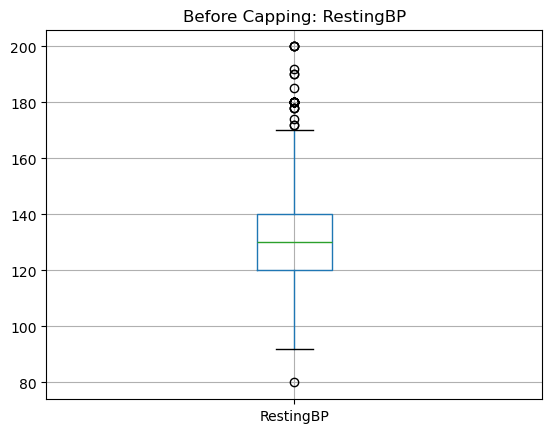

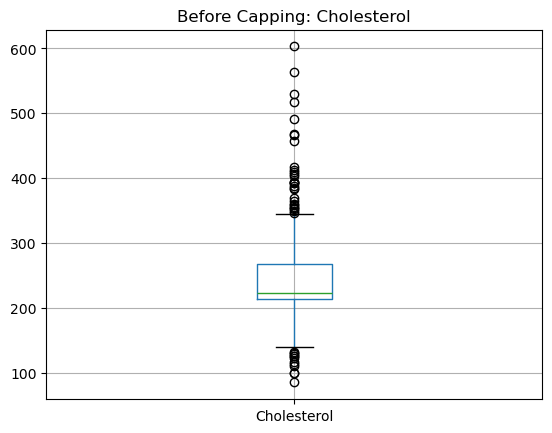

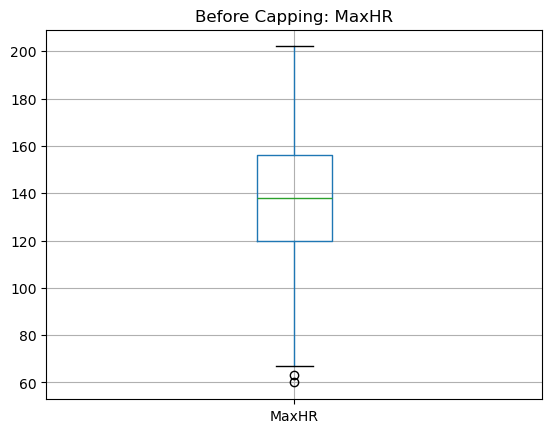

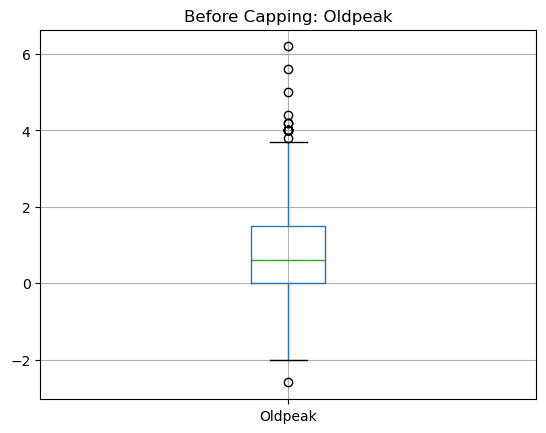

In [56]:
num_cols=['RestingBP','Cholesterol','MaxHR','Oldpeak']
for col in num_cols:
    plt.figure()
    heart.boxplot(column=[col])
    plt.title(f"Before Capping: {col}")
    plt.show()

In [57]:
for col in num_cols:
   Q1=heart[col].quantile(0.25)
   Q3=heart[col].quantile(0.75)
   IQR=Q3-Q1
   lower_cap=Q1-1.5*IQR
   upper_cap=Q3+1.5*IQR
   heart[col]=heart[col].clip(lower_cap, upper_cap)

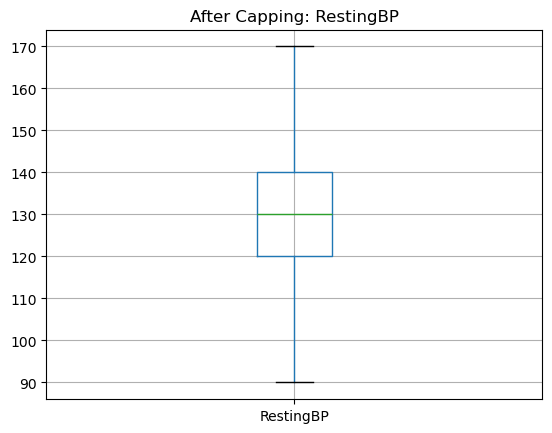

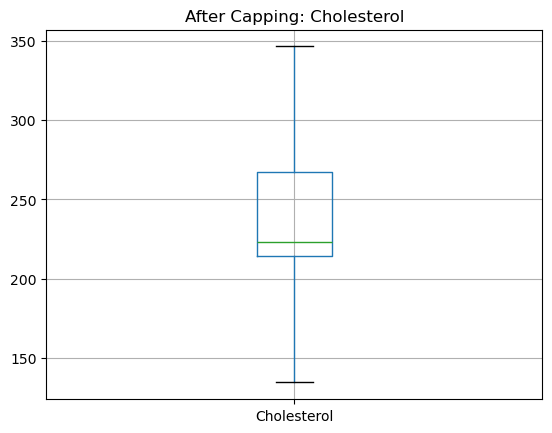

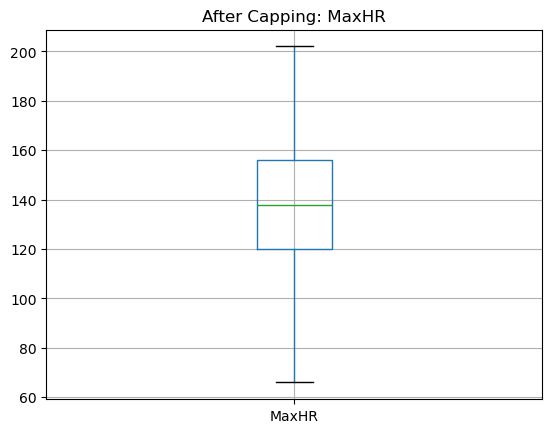

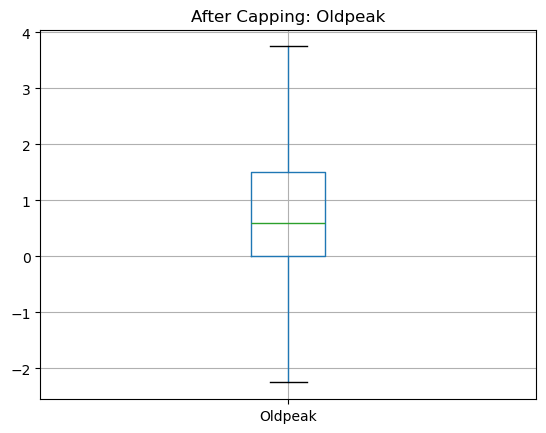

In [58]:
for col in num_cols:
    plt.figure()
    heart.boxplot(column=[col])
    plt.title(f"After Capping: {col}")
    plt.show()

# DATA VISUALISATION

### 1) UNIVARIATE ANALYSIS

### COUNTPLOT

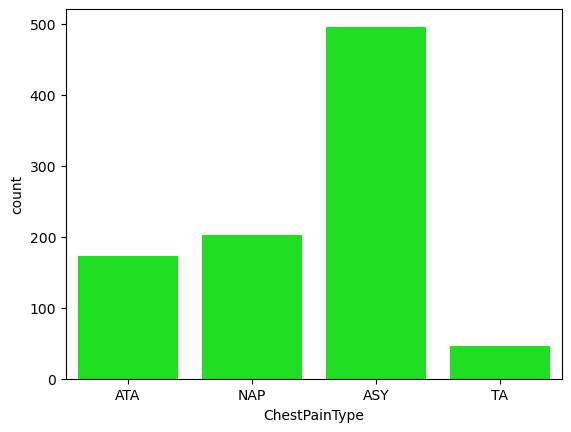

In [59]:
sns.countplot(x='ChestPainType',data=heart,color="#00ff04ea")
plt.show()

#### The bar labeled asymptomatic has the highest count meaning most patients in the dataset have asy chest pain
#### The typical angina category has the lowest count
#### The other two categories ATA and non angina pain have moderate counts between the two extremes

### DISTPLOT

C:\Users\Ashfidha\AppData\Local\Temp\ipykernel_17380\3230107794.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart['Cholesterol'],kde=True,bins=10,color='purple')


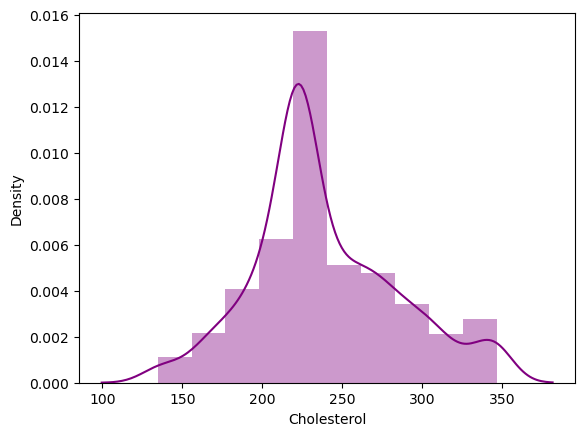

In [60]:
sns.distplot(heart['Cholesterol'],kde=True,bins=10,color='purple')
plt.show()

#### The bars represents the frequency of cholestrol values in your dataset

### 2) BIVARIATE ANALYSIS

### BOXPLOT

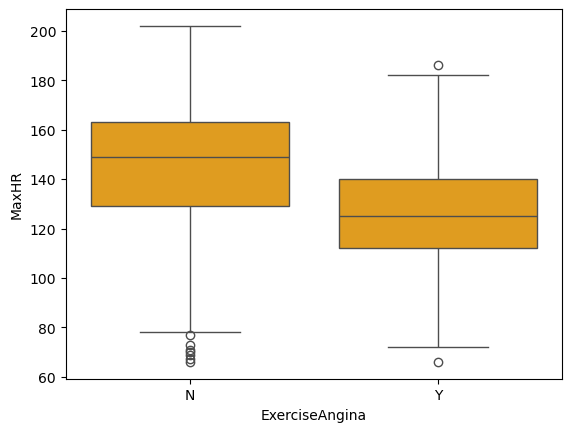

In [61]:
sns.boxplot(x='ExerciseAngina',y='MaxHR',data=heart,color='orange')
plt.show()

#### Patients without ExerciseAngina tend to have a higher MaxHR on average median around 150-160
#### Patients without ExerciseAngina generally have a lower MaxHR median around 130-140

### VIOLIN PLOT

C:\Users\Ashfidha\AppData\Local\Temp\ipykernel_17380\2952925974.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='HeartDisease',y='Cholesterol',data=heart,palette='Reds')


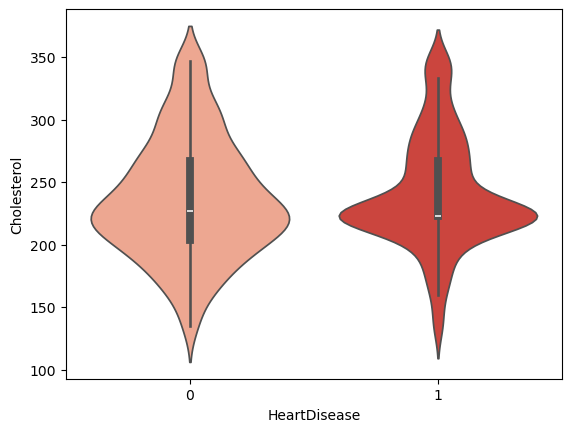

In [62]:
sns.violinplot(x='HeartDisease',y='Cholesterol',data=heart,palette='Reds')
plt.show()

### BARPLOT

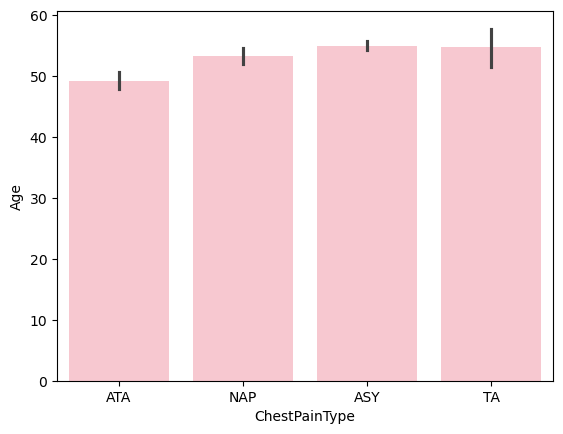

In [63]:
sns.barplot(x='ChestPainType',y='Age',data=heart,color='pink')
plt.show()

### 3) MULTIVARIATE ANALYSIS

### HEATMAP

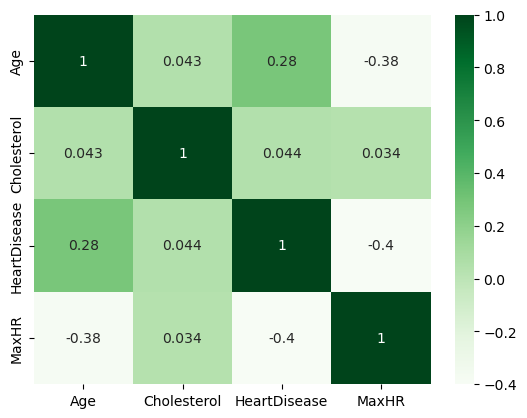

In [64]:
sns.heatmap(heart[['Age','Cholesterol','HeartDisease','MaxHR']].corr(),annot=True,cmap='Greens')
plt.show()

### PAIRPLOT

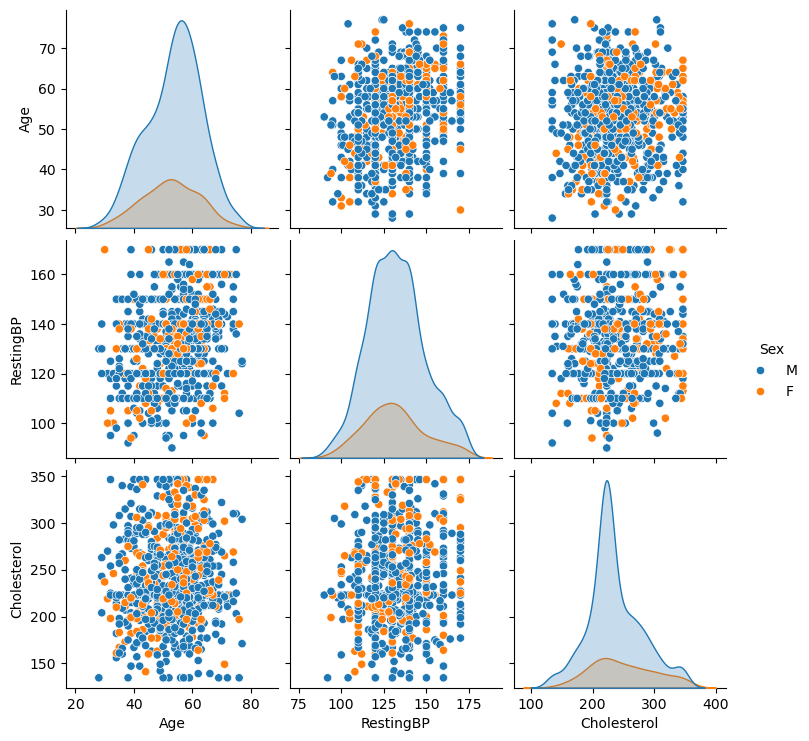

In [65]:
sns.pairplot(heart[['Age','ChestPainType','RestingBP','Sex','Cholesterol']],hue='Sex')
plt.show()

# ENCODING

In [66]:
le=LabelEncoder()

In [67]:
cols_to_encode=['Sex','Age','ChestPainType','RestingECG','ExerciseAngina']
for col in cols_to_encode:
    heart[col]=le.fit_transform(heart[col])
heart[cols_to_encode]

,Sex,Age,ChestPainType,RestingECG,ExerciseAngina
0,1,12,1,1,0
1,0,21,2,1,0
2,1,9,1,2,0
3,0,20,0,1,1
4,1,26,2,1,0
...,...,...,...,...,...
913,1,17,3,1,0
914,1,40,0,1,0
915,1,29,0,1,1
916,0,29,1,0,0


In [68]:
oe=OrdinalEncoder(categories=[['Down','Flat','Up']])
heart['ST_Slope']=oe.fit_transform(heart[['ST_Slope']])

In [69]:
heart=pd.get_dummies(heart,columns=['ChestPainType','RestingECG'],drop_first=True)

In [70]:
heart

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_1,ChestPainType_2,ChestPainType_3,RestingECG_1,RestingECG_2
0,12,1,140,289.0,0,172,0,0.0,2.0,0,True,False,False,True,False
1,21,0,160,180.0,0,156,0,1.0,1.0,1,False,True,False,True,False
2,9,1,130,283.0,0,98,0,0.0,2.0,0,True,False,False,False,True
3,20,0,138,214.0,0,108,1,1.5,1.0,1,False,False,False,True,False
4,26,1,150,195.0,0,122,0,0.0,2.0,0,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,17,1,110,264.0,0,132,0,1.2,1.0,1,False,False,True,True,False
914,40,1,144,193.0,1,141,0,3.4,1.0,1,False,False,False,True,False
915,29,1,130,134.5,0,115,1,1.2,1.0,1,False,False,False,True,False
916,29,0,130,236.0,0,174,0,0.0,1.0,1,True,False,False,False,False


In [71]:
heart['ST_Slope'].nunique()

3

# SCALING

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(heart)
scaled_data

array([[-1.4331398 ,  0.51595242,  0.46263892, ..., -0.22967867,
         0.81427482, -0.49044933],
       [-0.47848359, -1.93816322,  1.64417329, ..., -0.22967867,
         0.81427482, -0.49044933],
       [-1.75135854,  0.51595242, -0.12812826, ..., -0.22967867,
        -1.22808661,  2.03894663],
       ...,
       [ 0.37009972,  0.51595242, -0.12812826, ..., -0.22967867,
         0.81427482, -0.49044933],
       [ 0.37009972, -1.93816322, -0.12812826, ..., -0.22967867,
        -1.22808661, -0.49044933],
       [-1.64528563,  0.51595242,  0.34448548, ..., -0.22967867,
         0.81427482, -0.49044933]])

# MODEL BUILDING

In [74]:
x=heart.drop('HeartDisease',axis=1)
x

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,ChestPainType_1,ChestPainType_2,ChestPainType_3,RestingECG_1,RestingECG_2
0,12,1,140,289.0,0,172,0,0.0,2.0,True,False,False,True,False
1,21,0,160,180.0,0,156,0,1.0,1.0,False,True,False,True,False
2,9,1,130,283.0,0,98,0,0.0,2.0,True,False,False,False,True
3,20,0,138,214.0,0,108,1,1.5,1.0,False,False,False,True,False
4,26,1,150,195.0,0,122,0,0.0,2.0,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,17,1,110,264.0,0,132,0,1.2,1.0,False,False,True,True,False
914,40,1,144,193.0,1,141,0,3.4,1.0,False,False,False,True,False
915,29,1,130,134.5,0,115,1,1.2,1.0,False,False,False,True,False
916,29,0,130,236.0,0,174,0,0.0,1.0,True,False,False,False,False


In [75]:
y=heart['HeartDisease']
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
model=LogisticRegression()

In [80]:
model=model.fit(x_train,y_train)

C:\Users\Ashfidha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [81]:
y_pred=model.predict(x_test)

In [82]:
from sklearn.metrics import accuracy_score

In [83]:
accuracyscore=accuracy_score(y_test,y_pred)

In [84]:
accuracyscore

0.8521739130434782